<a href="https://colab.research.google.com/github/x110/DLToolboxImg/blob/master/NoduleSegmentationModel5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Configuration

In [0]:
# Remove CUDA 9 completely

!apt-get --purge remove cuda nvidia* libnvidia-*
!dpkg -l | grep cuda- | awk '{print $2}' | xargs -n1 dpkg --purge
!apt-get remove cuda-*
!apt autoremove

!apt-get update

In [0]:
# Install CUDA 8

!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/cuda-repo-ubuntu1604_8.0.61-1_amd64.deb
!dpkg -i --force-overwrite cuda-repo-ubuntu1604_8.0.61-1_amd64.deb
!apt-get update
!apt-get install cuda-8-0

# install will fail, need to force dpkg to overwrite the configuration file

!wget http://archive.ubuntu.com/ubuntu/pool/main/m/mesa/libglx-mesa0_18.0.5-0ubuntu0~18.04.1_amd64.deb
!dpkg -i --force-overwrite libglx-mesa0_18.0.5-0ubuntu0~18.04.1_amd64.deb

!wget http://developer.download.nvidia.com/compute/cuda/repos/ubuntu1604/x86_64/nvidia-410_410.48-0ubuntu1_amd64.deb
!dpkg -i --force-overwrite nvidia-410_410.48-0ubuntu1_amd64.deb

!apt --fix-broken install
!apt-get install cuda-8-0

In [0]:
!pip uninstall -y numpy

In [0]:
!pip uninstall -y scipy

In [0]:
!pip install turicreate
# The worng version of MXNET will be installed.
!pip uninstall -y mxnet

In [0]:
!pip install scipy

In [0]:
# Instal CUDA8-compatible version of mxnet 1.1.0
!pip install mxnet-cu80==1.1.0

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!mkdir x110
!mkdir x110/Datasets
!mkdir x110/Datasets/Dataset5
!cp -a '/content/drive/My Drive/Datasets/Dataset5/processed/.' 'x110/Datasets/Dataset5/processed/'

In [0]:
!mkdir x110/DLToolboxImg

In [12]:
!git clone https://github.com/x110/DLToolboxImg.git x110/DLToolboxImg

Cloning into 'x110/DLToolboxImg'...
remote: Enumerating objects: 119, done.
remote: Counting objects: 100% (119/119), done.
remote: Compressing objects: 100% (83/83), done.
remote: Total 706 (delta 71), reused 83 (delta 36), pack-reused 587
Receiving objects: 100% (706/706), 121.71 MiB | 27.31 MiB/s, done.
Resolving deltas: 100% (404/404), done.


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Configuration" data-toc-modified-id="Configuration-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Configuration</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Find-mean-of-images" data-toc-modified-id="Find-mean-of-images-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Find mean of images</a></span></li><li><span><a href="#Find-variance-of-images" data-toc-modified-id="Find-variance-of-images-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Find variance of images</a></span></li></ul></li><li><span><a href="#Data-Iterator" data-toc-modified-id="Data-Iterator-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Iterator</a></span></li><li><span><a href="#Evaluation-Metric" data-toc-modified-id="Evaluation-Metric-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluation Metric</a></span></li><li><span><a href="#Model-Architecture" data-toc-modified-id="Model-Architecture-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Architecture</a></span></li><li><span><a href="#Optimizer" data-toc-modified-id="Optimizer-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Optimizer</a></span><ul class="toc-item"><li><span><a href="#Find--learning-rate" data-toc-modified-id="Find--learning-rate-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Find  learning rate</a></span></li><li><span><a href="#Optimizer-Parameters" data-toc-modified-id="Optimizer-Parameters-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Optimizer Parameters</a></span></li></ul></li><li><span><a href="#Train-Model" data-toc-modified-id="Train-Model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Train Model</a></span></li><li><span><a href="#Evaluate-Model" data-toc-modified-id="Evaluate-Model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Evaluate Model</a></span></li></ul></div>

# Nodule Segmentation: Model

In [0]:
import sys
sys.path.insert(0,"x110/DLToolboxImg/src/")

In [0]:
import mynnet7 as nn
import pickle
import mxnet as mx
import time
import matplotlib.pyplot as plt
import numpy as np

In [0]:
def dice_coef0(label, y):
    smooth = 1.
    intersection = mx.sym.sum(label * y)
    return (2. * intersection + smooth) / (mx.sym.sum(label) + mx.sym.sum(mx.sym.abs(y)) + smooth)
    return label*log(y)+(1-label)*log(1-p)

def logloss(label, y,w=[.9,.1]):
    eps=1e-15
    return mx.sym.mean(-(w[0]*label*mx.sym.log(y+eps)+w[1]*(1-label)*mx.sym.log(1-y+eps)))


In [0]:
#activation 0.4 crossentropy. train on pos and neg
def get_net_320():
    source = mx.sym.Variable("data")
    label = mx.sym.Variable("softmax_label")
    #print_inferred_shape(source)

    kernel_size = (3, 3, 3)
    stride=(1, 1,1)
    pad_size = (1, 1, 1)
    filter_count = 32
    net =  mx.sym.Convolution(data=source, kernel=kernel_size, stride=stride, pad=pad_size, num_filter=filter_count)
    net = mx.sym.BatchNorm(net)
    net = mx.sym.Activation(net, act_type="relu")
    #print_inferred_shape(net)
    
    
    net = mx.sym.Convolution(net, kernel=kernel_size, stride=stride, pad=pad_size, num_filter=filter_count)
    net = mx.sym.BatchNorm(net)
    net = mx.sym.Activation(net, act_type="relu")
    #print_inferred_shape(net)
    
    net = mx.sym.Convolution(net, kernel=kernel_size, stride=stride, pad=pad_size, num_filter=filter_count)
    net = mx.sym.BatchNorm(net)
    net = mx.sym.Activation(net, act_type="relu")
    #print_inferred_shape(net)
    
    net1=net
    
    net = mx.sym.Pooling(net, pool_type="max", kernel=(2, 2,2), stride=(2,2, 2))
    #print_inferred_shape(net)
    
    net = mx.sym.Convolution(net, kernel=kernel_size, stride=stride, pad=pad_size, num_filter=filter_count)
    net = mx.sym.BatchNorm(net)
    net = mx.sym.Activation(net, act_type="relu")

    #print_inferred_shape(net)

    
    net =  mx.sym.Convolution(net, kernel=kernel_size, stride=stride, pad=pad_size, num_filter=filter_count)
    net = mx.sym.BatchNorm(net)
    net = mx.sym.Activation(net, act_type="relu")
    #print_inferred_shape(net)
    
    net = mx.sym.Convolution(net, kernel=kernel_size, stride=stride, pad=pad_size, num_filter=filter_count)
    net = mx.sym.BatchNorm(net)
    net = mx.sym.Activation(net, act_type="relu")
    #print_inferred_shape(net)
    
    net = mx.sym.Dropout(net,p=0.6)
    
    net = mx.sym.Deconvolution(net, kernel=(2, 2,2), pad=(0, 0,0), stride=(2,2, 2), num_filter=filter_count)
    net = mx.sym.Activation(net, act_type="relu")


    
    net = mx.sym.Concat(*[net1, net])
    #print_inferred_shape(net)

    net = mx.sym.Convolution(net, kernel=kernel_size, stride=stride, pad=pad_size, num_filter=filter_count)
    net = mx.sym.BatchNorm(net)
    net = mx.sym.Activation(net, act_type="relu")
    #print_inferred_shape(net)
    
    net = mx.sym.Convolution(net, kernel=kernel_size, stride=stride, pad=pad_size, num_filter=filter_count)
    net = mx.sym.BatchNorm(net)
    net = mx.sym.Activation(net, act_type="relu")
    #print_inferred_shape(net)
        
    net = mx.sym.Convolution(net, kernel=kernel_size, stride=stride, pad=pad_size, num_filter=1)
    net = mx.sym.BatchNorm(net,fix_gamma=False)
    net = mx.sym.Activation(net, act_type="sigmoid")
    #print_inferred_shape(net)
    
    y = mx.symbol.Flatten(net)
    #y=mx.symbol.LogisticRegressionOutput(data=y, name='softmax')
    loss= mx.sym.MakeLoss(logloss(label, y))
    y = mx.sym.Group([mx.sym.BlockGrad(y), loss])

    return y


In [0]:
interm_dir4='x110/Datasets/Dataset5/' 
s = "2018_11_06"
train_data_path=interm_dir4+'processed/train'+s+'.rec'
train_idx_path=interm_dir4+'processed/train'+s+'.idx'
valid_data_path=interm_dir4+'processed/valid'+s+'.rec'
valid_idx_path=interm_dir4+'processed/valid'+s+'.idx'
test_data_path=interm_dir4+'processed/test'+s+'.rec'
test_idx_path=interm_dir4+'processed/test'+s+'.idx'

In [0]:
!mkdir x110/model

In [0]:
find_stats = False#True
bs = 100#64#34
load_model = False
model_path = "drive/My Drive/x110/model/dec02"
model_epoch=415
prefix = "drive/My Drive/x110/model/dec03"

In [0]:
!cp  "drive/My Drive/x110/model/dec02-0415.params" x110/model/dec02-0415.params

In [0]:
!cp "drive/My Drive/x110/model/dec02-0415-symbol.json" x110/model/

cp: cannot stat 'drive/My Drive/x110/model/dec02-0415-symbol.json': No such file or directory


In [0]:
epochs = 10

## Preprocessing

### Find mean of images

In [21]:
if find_stats:
    BATCH_SIZE=1
    train_iter=nn.FileIter(train_data_path,train_idx_path,batch_size=BATCH_SIZE,do_augment=True,mean_image=0,std_image=1)
    train_iter.reset()
    x_mean = np.zeros((32,32,32))
    for i,batch in enumerate(train_iter):
        X =  batch.data[0][0][0].asnumpy()
        x_mean+=X
    x_mean=np.mean(x_mean/i)
    # Saving the objects:
    with open(interm_dir4+'processed/x_mean.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
        pickle.dump([x_mean], f)

else:
    with open(interm_dir4+'processed/x_mean.pkl','rb') as f:  # Python 3: open(..., 'rb')
        x_mean = pickle.load(f)
x_mean#x_mean=0.2826227159416579

[0.2826227159416579]

In [0]:
x_mean=0.28

### Find variance of images

In [23]:
if find_stats: 
    BATCH_SIZE=1
    train_iter=nn.FileIter(train_data_path,train_idx_path,batch_size=BATCH_SIZE,do_augment=True,mean_image=0,std_image = 1)
    train_iter.reset()
    x_var = np.zeros((32,32,32))
    for i,batch in enumerate(train_iter):
        X =  (batch.data[0][0][0].asnumpy()-x_mean)**2
        x_var+=X
    #x_var=x_var/(i-1)
    #x_var#x_mean=.2815
    N = i*32*32*32
    x_var = np.sum(x_var)/(N-1)
    x_var#x_var = .07877
    x_std = np.sqrt(x_var)#x_std=.2807
    with open(interm_dir4+'processed/x_std.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
        pickle.dump([x_std], f)
else:
    with open(interm_dir4+'processed/x_std.pkl','rb') as f:  # Python 3: open(..., 'rb')
        x_std = pickle.load(f)
x_std#x_std=0.2817920662435274

[0.2817920662435274]

In [0]:
x_std = 0.28

## Data Iterator

In [25]:
BATCH_SIZE=bs
train_iter=nn.FileIter(train_data_path,train_idx_path,batch_size=BATCH_SIZE,random_flip=True,do_augment=False,mean_image=x_mean,std_image = x_std,do_shuffle=True)
input_shapes = dict(train_iter.provide_data+train_iter.provide_label)
print(input_shapes)

/usr/local/lib/python3.6/dist-packages/mxnet/recordio.py:370: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  header = header._replace(label=np.fromstring(s, np.float32, header.flag))


{'data': (100, 1, 32, 32, 32), 'softmax_label': (100, 32768)}


In [26]:
BATCH_SIZE=bs
valid_iter=nn.FileIter(valid_data_path,valid_idx_path,batch_size=BATCH_SIZE,do_augment=False,mean_image=x_mean,std_image = x_std,do_shuffle=False)

/usr/local/lib/python3.6/dist-packages/mxnet/recordio.py:370: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  header = header._replace(label=np.fromstring(s, np.float32, header.flag))


In [0]:
train_iter.reset()
valid_iter.reset()

## Evaluation Metric

In [0]:
def dice_coef2(label, y):
    smooth = 1.
    label=mx.nd.array(label).as_in_context(mx.gpu(0))
    y=mx.nd.array(y).as_in_context(mx.gpu(0))
    intersection = mx.nd.sum(label*y)
    return ((2. * intersection + smooth) / (mx.nd.sum(label) +mx.nd.sum(mx.nd.abs(y)) + smooth))


In [0]:
def logloss2(label, y,w=[.9,.1]):
    smooth = 1.
    label=mx.nd.array(label).as_in_context(mx.gpu(0))
    y=mx.nd.array(y).as_in_context(mx.gpu(0))
    eps=1e-12
    return mx.nd.mean(-(w[0]*label*mx.nd.log(y+eps)+w[1]*(1-label)*mx.nd.log(1-y+eps)))

In [0]:
# ===============Evaluation metric(s)================= 
#metric = mx.metric.CrossEntropy()#
metric = mx.metric.CustomMetric(feval=logloss2)#nn.dice_coef2)

In [0]:
eval_metrics_1 =  mx.metric.CustomMetric(feval=logloss2)
eval_metrics_2 = mx.metric.CustomMetric(feval=nn.dice_coef2)
metric= mx.metric.CompositeEvalMetric()
for child_metric in [eval_metrics_1, eval_metrics_2]:
  metric.add(child_metric)

## Model Architecture

In [32]:
load_model

False

In [33]:
if load_model:
    network, arg_params, aux_params = mx.model.load_checkpoint(model_path , model_epoch)

    # Binding
    exe = network.simple_bind(ctx=mx.gpu(0), **input_shapes)


    exe.copy_params_from(arg_params, aux_params)
    
    # get handle to input arrays
    arg_arrays = dict(zip(network.list_arguments(), exe.arg_arrays))
    data = arg_arrays[train_iter.provide_data[0][0]]
    label = arg_arrays[train_iter.provide_label[0][0]]
else:

    network = get_net_320()
    init = mx.init.Normal(0.01) #note biases and gamma/beta are not affected

    # Binding
    exe = network.simple_bind(ctx=mx.gpu(), **input_shapes)
    # get handle to input arrays
    arg_arrays = dict(zip(network.list_arguments(), exe.arg_arrays))
    data = arg_arrays[train_iter.provide_data[0][0]]
    label = arg_arrays[train_iter.provide_label[0][0]]
    for name, arr in arg_arrays.items():
        if name not in input_shapes:
            init(name, arr)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: DeprecationWarning: Calling initializer with init(str, NDArray) has been deprecated.please use init(mx.init.InitDesc(...), NDArray) instead.


In [0]:
  trainlosses=[]
  validlosses=[]
  trainlosses2=[]
  validlosses2=[]

## Optimizer

### Find  learning rate

In [34]:
nb=train_iter.num_data//train_iter.batch_size
nb

31

/usr/local/lib/python3.6/dist-packages/mxnet/recordio.py:370: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  header = header._replace(label=np.fromstring(s, np.float32, header.flag))


time: 162.2686755657196 Epoch: 0 trainloss: -0.08941927 validloss: -0.2197005 CE [0.22721429]
logloss2 0.2197005, dice_coef2 0.12762032, 

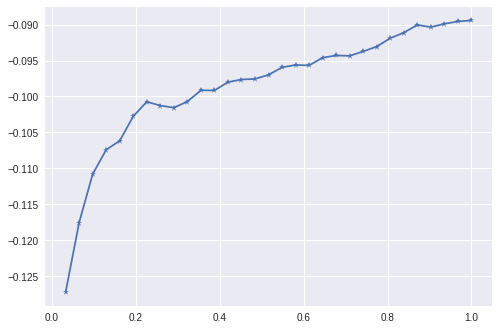

In [38]:
sched=nn.lr_find(1e-2,nb,end_lr=1)
# We also need to create an optimizer for updating weights
opt = mx.optimizer.SGD(
    learning_rate=1e-2,
    momentum=0.9,
    wd=0.00001,
    lr_scheduler=sched)

updater = mx.optimizer.get_updater(opt)
for epoch in range(0,1):

    start = time.time()

    metric.reset()

    train_iter.reset()
    
    valid_iter.reset()
    
    sched.reset()
        
    sched.on_train_begin()
    

    for batch in train_iter:
        # Copy data to executor input. Note the [:].
        data[:] = batch.data[0]
        label[:] = batch.label[0]

        # Forward
        outputs=exe.forward(is_train=True)
        # Backward
        exe.backward()

        # Update
        for i, pair in enumerate(zip(exe.arg_arrays, exe.grad_arrays)):
            weight, grad = pair
            updater(i, grad, weight)   
        #metric.update(batch.label[0], exe.outputs[0])#
        metric.update(batch.label[0], exe.outputs[0])
        
        e=metric.get()
        err_train=-e[1][0].asnumpy()[0]
        sched.on_batch_end(err_train)
    
    if epoch % 100== 0:       
        #print("do_checkpoint")
        arg={k:v for k, v in arg_arrays.items() if k not in input_shapes}
        aux = dict(zip(network.list_auxiliary_states(), exe.aux_arrays))
        mx.model.save_checkpoint(prefix, epoch, network, arg, aux)
        
        
    #compute valid loss per epoch    
    metric.reset()
    for batch in valid_iter:        
        data[:] = batch.data[0]       
        label[:] = batch.label[0]
        # predict
        outputs = exe.forward(is_train=False)
        metric.update(batch.label[0], exe.outputs[0])
    e=metric.get()
    err_valid=-e[1][0].asnumpy()[0]
    end = time.time()
    print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'CE',outputs[1].asnumpy())
    for x,y in zip(e[0],e[1]):
      print(x,y[0].asnumpy()[0], end=", ", flush=True)
plt.plot(sched.lrs, sched.losses,'*-')

In [39]:
sched.lrs[:3]

[0.03225806451612903, 0.06451612903225806, 0.09677419354838708]

/usr/local/lib/python3.6/dist-packages/mxnet/recordio.py:370: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  header = header._replace(label=np.fromstring(s, np.float32, header.flag))


time: 154.54463744163513 Epoch: 0 trainloss: -0.074654356 validloss: -0.074614055 CE [0.06709674]
logloss2 0.074614055, dice_coef2 0.11060855, 

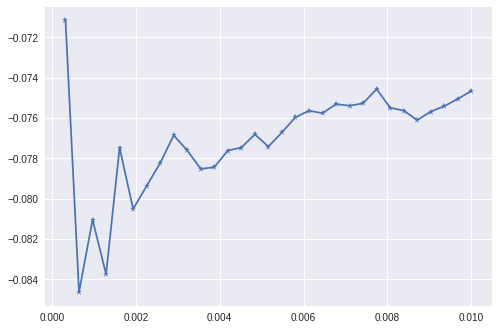

In [41]:
sched=nn.lr_find(1e-3,nb,end_lr=1e-2)
# We also need to create an optimizer for updating weights
opt = mx.optimizer.SGD(
    learning_rate=1e-3,
    momentum=0.9,
    wd=0.00001,
    lr_scheduler=sched)

updater = mx.optimizer.get_updater(opt)
for epoch in range(0,1):

    start = time.time()

    metric.reset()

    train_iter.reset()
    
    valid_iter.reset()
    
    sched.reset()
        
    sched.on_train_begin()
    

    for batch in train_iter:
        # Copy data to executor input. Note the [:].
        data[:] = batch.data[0]
        label[:] = batch.label[0]

        # Forward
        outputs=exe.forward(is_train=True)
        # Backward
        exe.backward()

        # Update
        for i, pair in enumerate(zip(exe.arg_arrays, exe.grad_arrays)):
            weight, grad = pair
            updater(i, grad, weight)   
        #metric.update(batch.label[0], exe.outputs[0])#
        metric.update(batch.label[0], exe.outputs[0])
        
        e=metric.get()
        err_train=-e[1][0].asnumpy()[0]
        sched.on_batch_end(err_train)
    
    if epoch % 100== 0:       
        #print("do_checkpoint")
        arg={k:v for k, v in arg_arrays.items() if k not in input_shapes}
        aux = dict(zip(network.list_auxiliary_states(), exe.aux_arrays))
        mx.model.save_checkpoint(prefix, epoch, network, arg, aux)
        
        
    #compute valid loss per epoch    
    metric.reset()
    for batch in valid_iter:        
        data[:] = batch.data[0]       
        label[:] = batch.label[0]
        # predict
        outputs = exe.forward(is_train=False)
        metric.update(batch.label[0], exe.outputs[0])
    e=metric.get()
    err_valid=-e[1][0].asnumpy()[0]
    end = time.time()
    print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'CE',outputs[1].asnumpy())
    for x,y in zip(e[0],e[1]):
      print(x,y[0].asnumpy()[0], end=", ", flush=True)
plt.plot(sched.lrs, sched.losses,'*-')

In [42]:
sched.lrs[:4]

[0.0003225806451612903,
 0.0006451612903225806,
 0.000967741935483871,
 0.0012903225806451613]

/usr/local/lib/python3.6/dist-packages/mxnet/recordio.py:370: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  header = header._replace(label=np.fromstring(s, np.float32, header.flag))


time: 154.8642702102661 Epoch: 0 trainloss: -0.07246742 validloss: -0.07252201 CE [0.06468344]
logloss2 0.07252201, dice_coef2 0.114428885, 

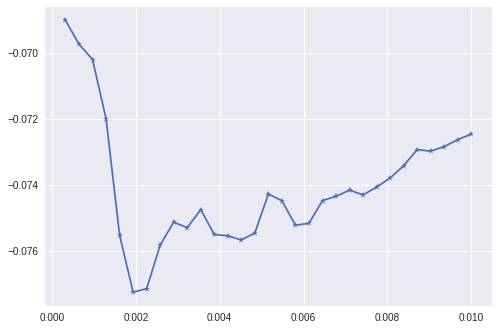

In [43]:
sched=nn.lr_find(1e-3,nb,end_lr=1e-2)
# We also need to create an optimizer for updating weights
opt = mx.optimizer.SGD(
    learning_rate=1e-2,
    momentum=0.9,
    wd=0.00001,
    lr_scheduler=sched)

updater = mx.optimizer.get_updater(opt)
for epoch in range(0,1):

    start = time.time()

    metric.reset()

    train_iter.reset()
    
    valid_iter.reset()
    
    sched.reset()
        
    sched.on_train_begin()
    

    for batch in train_iter:
        # Copy data to executor input. Note the [:].
        data[:] = batch.data[0]
        label[:] = batch.label[0]

        # Forward
        outputs=exe.forward(is_train=True)
        # Backward
        exe.backward()

        # Update
        for i, pair in enumerate(zip(exe.arg_arrays, exe.grad_arrays)):
            weight, grad = pair
            updater(i, grad, weight)   
        #metric.update(batch.label[0], exe.outputs[0])#
        metric.update(batch.label[0], exe.outputs[0])
        
        e=metric.get()
        err_train=-e[1][0].asnumpy()[0]
        sched.on_batch_end(err_train)
    
    if epoch % 100== 0:       
        #print("do_checkpoint")
        arg={k:v for k, v in arg_arrays.items() if k not in input_shapes}
        aux = dict(zip(network.list_auxiliary_states(), exe.aux_arrays))
        mx.model.save_checkpoint(prefix, epoch, network, arg, aux)
        
        
    #compute valid loss per epoch    
    metric.reset()
    for batch in valid_iter:        
        data[:] = batch.data[0]       
        label[:] = batch.label[0]
        # predict
        outputs = exe.forward(is_train=False)
        metric.update(batch.label[0], exe.outputs[0])
    e=metric.get()
    err_valid=-e[1][0].asnumpy()[0]
    end = time.time()
    print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'CE',outputs[1].asnumpy())
    for x,y in zip(e[0],e[1]):
      print(x,y[0].asnumpy()[0], end=", ", flush=True)
plt.plot(sched.lrs, sched.losses,'*-')

In [45]:
sched.lrs[:5]

[0.0003225806451612903,
 0.0006451612903225806,
 0.000967741935483871,
 0.0012903225806451613,
 0.0016129032258064516]

### Optimizer Parameters

In [0]:
# We also need to create an optimizer for updating weights
# ===============Optimizer=================                        
opt = mx.optimizer.SGD(
    learning_rate=.0012,momentum=0.99,wd=0.000001)

In [0]:
updater = mx.optimizer.get_updater(opt)

In [0]:
updater.optimizer.lr_scheduler=None

In [0]:
epochs = 10

## Train Model

In [50]:
Es_train=[]
for epoch in range(0,epochs+1):

    start = time.time()

    metric.reset()

    train_iter.reset()
    
    valid_iter.reset()
    

    for batch in train_iter:
        # Copy data to executor input. Note the [:].
        data[:] = batch.data[0]
        label[:] = batch.label[0]

        # Forward
        outputs=exe.forward(is_train=True)
        Es_train.append(outputs[1].asnumpy()[0])
        # Backward
        exe.backward()

        # Update
        for i, pair in enumerate(zip(exe.arg_arrays, exe.grad_arrays)):
            weight, grad = pair
            updater(i, grad, weight)   
        metric.update(batch.label[0], exe.outputs[0])#metric.update(label,p)
        
    e=metric.get()
    err_train=-e[1][0].asnumpy()[0]
    err_train2=-e[1][1].asnumpy()[0]
    
    if epoch % 1== 0:       
        #print("do_checkpoint")
        arg={k:v for k, v in arg_arrays.items() if k not in input_shapes}
        aux = dict(zip(network.list_auxiliary_states(), exe.aux_arrays))
        mx.model.save_checkpoint(prefix, epoch, network, arg, aux)
        
        
    #compute valid loss per epoch    
    metric.reset()
    for batch in valid_iter:        
        data[:] = batch.data[0]       
        label[:] = batch.label[0]
        # predict
        outputs = exe.forward(is_train=False)
        metric.update(batch.label[0], exe.outputs[0])
    e=metric.get()
    err_valid=-e[1][0].asnumpy()[0]
    err_valid2=-e[1][1].asnumpy()[0]
    end = time.time()
    print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'trainloss2:',err_train2,'validloss2:',err_valid2)
    #print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'trainloss2',outputs[1].asnumpy())

    #print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid)
    #for x,y in zip(e[0],e[1]):
      #print(x,y[0].asnumpy()[0], end=", ", flush=True)


/usr/local/lib/python3.6/dist-packages/mxnet/recordio.py:370: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  header = header._replace(label=np.fromstring(s, np.float32, header.flag))


time: 144.28326535224915 Epoch: 0 trainloss: -0.07142236 validloss: -0.07139961 trainloss2: -0.12488233 validloss2: -0.117287405
time: 143.656986951828 Epoch: 1 trainloss: -0.07040559 validloss: -0.07049711 trainloss2: -0.12613171 validloss2: -0.117943466
time: 143.8061330318451 Epoch: 2 trainloss: -0.06906448 validloss: -0.06975617 trainloss2: -0.12865426 validloss2: -0.11955572
time: 144.20256066322327 Epoch: 3 trainloss: -0.06765821 validloss: -0.06757421 trainloss2: -0.13108692 validloss2: -0.1233784
time: 143.95572137832642 Epoch: 4 trainloss: -0.0657937 validloss: -0.065896995 trainloss2: -0.13420495 validloss2: -0.12608907
time: 143.85628390312195 Epoch: 5 trainloss: -0.06427495 validloss: -0.06438716 trainloss2: -0.13658002 validloss2: -0.12894584
time: 143.8688530921936 Epoch: 6 trainloss: -0.062263407 validloss: -0.06274233 trainloss2: -0.13971569 validloss2: -0.13143748
time: 143.9874713420868 Epoch: 7 trainloss: -0.06061169 validloss: -0.060795207 trainloss2: -0.1416014 val

In [0]:
#plot the loss over epoch

In [0]:
Es_train = np.array(Es_train)

In [0]:
Es_train2 = Es_train.reshape((-1,nb))

In [0]:
Es_train2m=np.mean(Es_train2,axis=1)

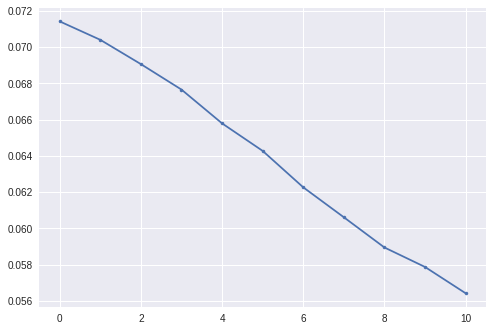

In [72]:
plt.plot(Es_train2m,'.-')

In [0]:
Es_train3=list(Es_train2m)

In [73]:
epoch_r  =epoch+1
epoch_r
Es_train=[]
Es_valid=[]
for epoch in range(epoch_r,epoch_r+epochs+1):

    start = time.time()

    metric.reset()

    train_iter.reset()
    
    valid_iter.reset()
    

    for batch in train_iter:
        # Copy data to executor input. Note the [:].
        data[:] = batch.data[0]
        label[:] = batch.label[0]

        # Forward
        outputs=exe.forward(is_train=True)
        Es_train.append(outputs[1].asnumpy()[0])
        # Backward
        exe.backward()

        # Update
        for i, pair in enumerate(zip(exe.arg_arrays, exe.grad_arrays)):
            weight, grad = pair
            updater(i, grad, weight)   
        metric.update(batch.label[0], exe.outputs[0])#metric.update(label,p)
        
    e=metric.get()
    err_train=-e[1][0].asnumpy()[0]
    err_train2=-e[1][1].asnumpy()[0]
    
    if epoch % 10== 0:       
        #print("do_checkpoint")
        arg={k:v for k, v in arg_arrays.items() if k not in input_shapes}
        aux = dict(zip(network.list_auxiliary_states(), exe.aux_arrays))
        mx.model.save_checkpoint(prefix, epoch, network, arg, aux)
        
        
    #compute valid loss per epoch    
    metric.reset()
    for batch in valid_iter:        
        data[:] = batch.data[0]       
        label[:] = batch.label[0]
        # predict
        outputs = exe.forward(is_train=False)
        Es_valid.append(outputs[1].asnumpy()[0])
        metric.update(batch.label[0], exe.outputs[0])
    e=metric.get()
    err_valid=-e[1][0].asnumpy()[0]
    err_valid2=-e[1][1].asnumpy()[0]
    end = time.time()
    print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'trainloss2:',err_train2,'validloss2:',err_valid2)
    #print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'trainloss2',outputs[1].asnumpy())

    #print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid)
    #for x,y in zip(e[0],e[1]):
      #print(x,y[0].asnumpy()[0], end=", ", flush=True)


/usr/local/lib/python3.6/dist-packages/mxnet/recordio.py:370: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  header = header._replace(label=np.fromstring(s, np.float32, header.flag))


time: 144.35788226127625 Epoch: 11 trainloss: -0.055577245 validloss: -0.05721765 trainloss2: -0.1505857 validloss2: -0.14221653
time: 143.6606011390686 Epoch: 12 trainloss: -0.054642744 validloss: -0.056638874 trainloss2: -0.1523272 validloss2: -0.14375211
time: 144.07124209403992 Epoch: 13 trainloss: -0.053717572 validloss: -0.055537853 trainloss2: -0.15545787 validloss2: -0.14328074
time: 144.36984992027283 Epoch: 14 trainloss: -0.052894924 validloss: -0.057684936 trainloss2: -0.15573686 validloss2: -0.14475872
time: 144.1281292438507 Epoch: 15 trainloss: -0.05189387 validloss: -0.054573253 trainloss2: -0.16005655 validloss2: -0.14903386
time: 144.14891004562378 Epoch: 16 trainloss: -0.051449347 validloss: -0.054470353 trainloss2: -0.15998189 validloss2: -0.15052417
time: 143.89305233955383 Epoch: 17 trainloss: -0.05083131 validloss: -0.05363724 trainloss2: -0.16308449 validloss2: -0.14561652
time: 144.00826263427734 Epoch: 18 trainloss: -0.04999526 validloss: -0.053583033 trainloss

In [0]:
#plot the loss over epoch
Es_train = np.array(Es_train)
Es_train2 = Es_train.reshape((-1,nb))
Es_train3.extend([e for e in list(np.mean(Es_train2,axis=1))])

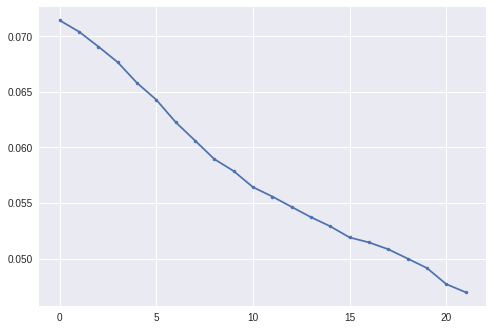

In [98]:
plt.plot(Es_train3,'.-')

In [99]:
epoch_r  =epoch+1
epoch_r
Es_train=[]
Es_valid=[]
for epoch in range(epoch_r,epoch_r+epochs+1):

    start = time.time()

    metric.reset()

    train_iter.reset()
    
    valid_iter.reset()
    

    for batch in train_iter:
        # Copy data to executor input. Note the [:].
        data[:] = batch.data[0]
        label[:] = batch.label[0]

        # Forward
        outputs=exe.forward(is_train=True)
        Es_train.append(outputs[1].asnumpy()[0])
        # Backward
        exe.backward()

        # Update
        for i, pair in enumerate(zip(exe.arg_arrays, exe.grad_arrays)):
            weight, grad = pair
            updater(i, grad, weight)   
        metric.update(batch.label[0], exe.outputs[0])#metric.update(label,p)
        
    e=metric.get()
    err_train=-e[1][0].asnumpy()[0]
    err_train2=-e[1][1].asnumpy()[0]
    
    if epoch % 10== 0:       
        #print("do_checkpoint")
        arg={k:v for k, v in arg_arrays.items() if k not in input_shapes}
        aux = dict(zip(network.list_auxiliary_states(), exe.aux_arrays))
        mx.model.save_checkpoint(prefix, epoch, network, arg, aux)
        
        
    #compute valid loss per epoch    
    metric.reset()
    for batch in valid_iter:        
        data[:] = batch.data[0]       
        label[:] = batch.label[0]
        # predict
        outputs = exe.forward(is_train=False)
        Es_valid.append(outputs[1].asnumpy()[0])
        metric.update(batch.label[0], exe.outputs[0])
    e=metric.get()
    err_valid=-e[1][0].asnumpy()[0]
    err_valid2=-e[1][1].asnumpy()[0]
    end = time.time()
    print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'trainloss2:',err_train2,'validloss2:',err_valid2)
    #print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'trainloss2',outputs[1].asnumpy())

    #print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid)
    #for x,y in zip(e[0],e[1]):
      #print(x,y[0].asnumpy()[0], end=", ", flush=True)


/usr/local/lib/python3.6/dist-packages/mxnet/recordio.py:370: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  header = header._replace(label=np.fromstring(s, np.float32, header.flag))


time: 144.34420466423035 Epoch: 22 trainloss: -0.046869237 validloss: -0.04861513 trainloss2: -0.17442828 validloss2: -0.16696084
time: 143.98912858963013 Epoch: 23 trainloss: -0.04646793 validloss: -0.048885744 trainloss2: -0.17601627 validloss2: -0.16322596
time: 143.87676644325256 Epoch: 24 trainloss: -0.045766637 validloss: -0.052605912 trainloss2: -0.17942259 validloss2: -0.16716646
time: 144.04805541038513 Epoch: 25 trainloss: -0.045505114 validloss: -0.048883848 trainloss2: -0.1810622 validloss2: -0.17015062
time: 144.23374366760254 Epoch: 26 trainloss: -0.04536318 validloss: -0.050952885 trainloss2: -0.18114303 validloss2: -0.16425501
time: 144.37820553779602 Epoch: 27 trainloss: -0.044892993 validloss: -0.058228135 trainloss2: -0.18349129 validloss2: -0.16169202
time: 144.2481713294983 Epoch: 28 trainloss: -0.044305872 validloss: -0.046830535 trainloss2: -0.18486121 validloss2: -0.17214213
time: 144.06982970237732 Epoch: 29 trainloss: -0.043653563 validloss: -0.048165854 train

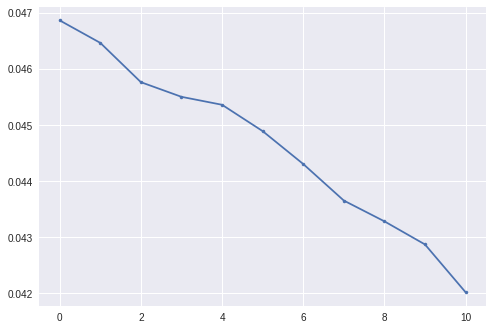

In [129]:
#plot the loss over epoch
Es_train = np.array(Es_train)
Es_train2 = Es_train.reshape((-1,nb))
Es_train3.extend([e for e in list(np.mean(Es_train2,axis=1))])
plt.plot(Es_train3,'.-')

In [0]:
#Es_valid3=[]
#Es_train3=[]


In [0]:
nb2 = valid_iter.num_data//valid_iter.batch_size


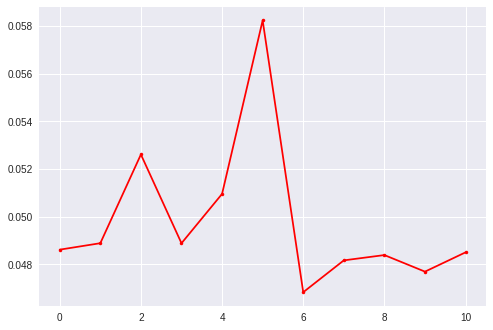

In [130]:
#plot the loss over epoch
Es_valid = np.array(Es_valid)
Es_valid2 = Es_valid.reshape((-1,nb2))
Es_valid3.extend([e for e in list(np.mean(Es_valid2,axis=1))])
plt.plot(Es_valid3,'.-r')

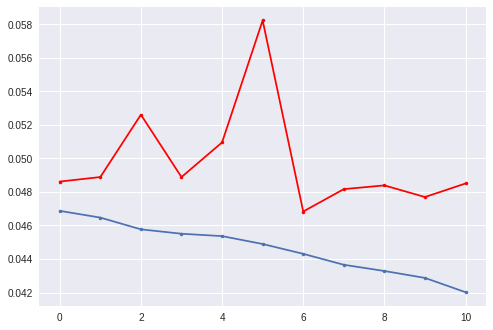

In [131]:
plt.plot(Es_train3,'.-')
plt.plot(Es_valid3,'.-r')

In [0]:
epochs=20

In [133]:
epoch_r  =epoch+1
epoch_r
Es_train=[]
Es_valid=[]
for epoch in range(epoch_r,epoch_r+epochs+1):

    start = time.time()

    metric.reset()

    train_iter.reset()
    
    valid_iter.reset()
    

    for batch in train_iter:
        # Copy data to executor input. Note the [:].
        data[:] = batch.data[0]
        label[:] = batch.label[0]

        # Forward
        outputs=exe.forward(is_train=True)
        Es_train.append(outputs[1].asnumpy()[0])
        # Backward
        exe.backward()

        # Update
        for i, pair in enumerate(zip(exe.arg_arrays, exe.grad_arrays)):
            weight, grad = pair
            updater(i, grad, weight)   
        metric.update(batch.label[0], exe.outputs[0])#metric.update(label,p)
        
    e=metric.get()
    err_train=-e[1][0].asnumpy()[0]
    err_train2=-e[1][1].asnumpy()[0]
    
    if epoch % 10== 0:       
        #print("do_checkpoint")
        arg={k:v for k, v in arg_arrays.items() if k not in input_shapes}
        aux = dict(zip(network.list_auxiliary_states(), exe.aux_arrays))
        mx.model.save_checkpoint(prefix, epoch, network, arg, aux)
        
        
    #compute valid loss per epoch    
    metric.reset()
    for batch in valid_iter:        
        data[:] = batch.data[0]       
        label[:] = batch.label[0]
        # predict
        outputs = exe.forward(is_train=False)
        Es_valid.append(outputs[1].asnumpy()[0])
        metric.update(batch.label[0], exe.outputs[0])
    e=metric.get()
    err_valid=-e[1][0].asnumpy()[0]
    err_valid2=-e[1][1].asnumpy()[0]
    end = time.time()
    print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'trainloss2:',err_train2,'validloss2:',err_valid2)
    #print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'trainloss2',outputs[1].asnumpy())

    #print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid)
    #for x,y in zip(e[0],e[1]):
      #print(x,y[0].asnumpy()[0], end=", ", flush=True)


/usr/local/lib/python3.6/dist-packages/mxnet/recordio.py:370: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  header = header._replace(label=np.fromstring(s, np.float32, header.flag))


time: 143.7974796295166 Epoch: 33 trainloss: -0.0418272 validloss: -0.04517229 trainloss2: -0.19489557 validloss2: -0.17923267
time: 143.98624515533447 Epoch: 34 trainloss: -0.04143571 validloss: -0.044216353 trainloss2: -0.19653155 validloss2: -0.1836278
time: 144.09578561782837 Epoch: 35 trainloss: -0.04088247 validloss: -0.052131474 trainloss2: -0.19838701 validloss2: -0.18418941
time: 144.1771445274353 Epoch: 36 trainloss: -0.040774893 validloss: -0.04487526 trainloss2: -0.19961989 validloss2: -0.18662381
time: 144.17965364456177 Epoch: 37 trainloss: -0.040110867 validloss: -0.043913692 trainloss2: -0.20181042 validloss2: -0.18413955
time: 144.18239331245422 Epoch: 38 trainloss: -0.039974775 validloss: -0.046277147 trainloss2: -0.20286669 validloss2: -0.18812026
time: 144.28578734397888 Epoch: 39 trainloss: -0.03987081 validloss: -0.043866735 trainloss2: -0.20475376 validloss2: -0.18554813
time: 143.15961813926697 Epoch: 40 trainloss: -0.039381478 validloss: -0.045320388 trainloss2

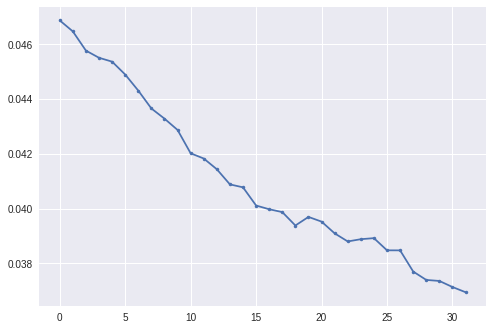

In [134]:
#plot the loss over epoch
Es_train = np.array(Es_train)
Es_train2 = Es_train.reshape((-1,nb))
Es_train3.extend([e for e in list(np.mean(Es_train2,axis=1))])
plt.plot(Es_train3,'.-')


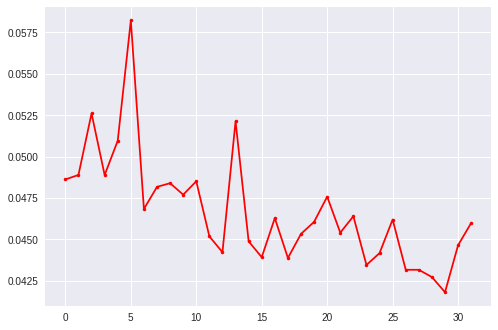

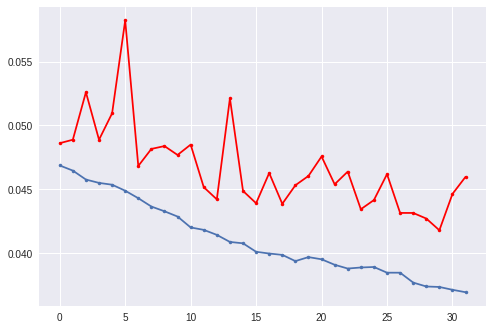

In [135]:
#plot the loss over epoch
Es_valid = np.array(Es_valid)
Es_valid2 = Es_valid.reshape((-1,nb2))
Es_valid3.extend([e for e in list(np.mean(Es_valid2,axis=1))])
plt.figure()
plt.plot(Es_valid3,'.-r')
plt.figure()
plt.plot(Es_train3,'.-')
plt.plot(Es_valid3,'.-r')

In [0]:
lrs = []
loss = []

/usr/local/lib/python3.6/dist-packages/mxnet/recordio.py:370: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  header = header._replace(label=np.fromstring(s, np.float32, header.flag))


time: 155.30079746246338 Epoch: 0 trainloss: -0.036349393 validloss: -0.0418455 CE [0.03234268]
logloss2 0.0418455, dice_coef2 0.21258256, 

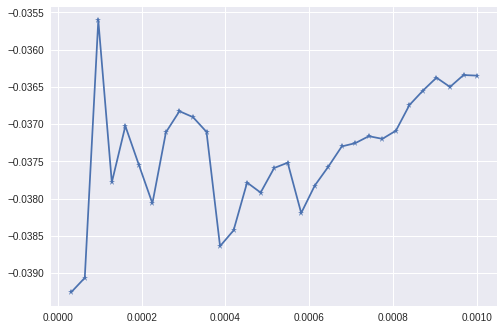

In [137]:
sched=nn.lr_find(1e-4,nb,end_lr=1e-3)
# We also need to create an optimizer for updating weights
opt = mx.optimizer.SGD(
    learning_rate=1e-4,
    momentum=0.9,
    wd=0.00001,
    lr_scheduler=sched)

updater = mx.optimizer.get_updater(opt)
for epoch in range(0,1):

    start = time.time()

    metric.reset()

    train_iter.reset()
    
    valid_iter.reset()
    
    sched.reset()
        
    sched.on_train_begin()
    

    for batch in train_iter:
        # Copy data to executor input. Note the [:].
        data[:] = batch.data[0]
        label[:] = batch.label[0]

        # Forward
        outputs=exe.forward(is_train=True)
        # Backward
        exe.backward()

        # Update
        for i, pair in enumerate(zip(exe.arg_arrays, exe.grad_arrays)):
            weight, grad = pair
            updater(i, grad, weight)   
        #metric.update(batch.label[0], exe.outputs[0])#
        metric.update(batch.label[0], exe.outputs[0])
        
        e=metric.get()
        err_train=-e[1][0].asnumpy()[0]
        sched.on_batch_end(err_train)
    
    if epoch % 100== 0:       
        #print("do_checkpoint")
        arg={k:v for k, v in arg_arrays.items() if k not in input_shapes}
        aux = dict(zip(network.list_auxiliary_states(), exe.aux_arrays))
        mx.model.save_checkpoint(prefix, epoch, network, arg, aux)
        
        
    #compute valid loss per epoch    
    metric.reset()
    for batch in valid_iter:        
        data[:] = batch.data[0]       
        label[:] = batch.label[0]
        # predict
        outputs = exe.forward(is_train=False)
        metric.update(batch.label[0], exe.outputs[0])
    e=metric.get()
    err_valid=-e[1][0].asnumpy()[0]
    end = time.time()
    print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'CE',outputs[1].asnumpy())
    for x,y in zip(e[0],e[1]):
      print(x,y[0].asnumpy()[0], end=", ", flush=True)
plt.plot(sched.lrs, sched.losses,'*-')

In [140]:
sched.lrs[5:8]

[0.00019354838709677422, 0.00022580645161290321, 0.00025806451612903227]

In [0]:
# We also need to create an optimizer for updating weights
# ===============Optimizer=================                        
opt = mx.optimizer.SGD(
    learning_rate=.0002,momentum=0.99,wd=0.000001)
updater = mx.optimizer.get_updater(opt)
updater.optimizer.lr_scheduler=None

In [142]:
epoch_r  = 53
epoch_r
Es_train=[]
Es_valid=[]
for epoch in range(epoch_r,epoch_r+epochs+1):

    start = time.time()

    metric.reset()

    train_iter.reset()
    
    valid_iter.reset()
    

    for batch in train_iter:
        # Copy data to executor input. Note the [:].
        data[:] = batch.data[0]
        label[:] = batch.label[0]

        # Forward
        outputs=exe.forward(is_train=True)
        Es_train.append(outputs[1].asnumpy()[0])
        # Backward
        exe.backward()

        # Update
        for i, pair in enumerate(zip(exe.arg_arrays, exe.grad_arrays)):
            weight, grad = pair
            updater(i, grad, weight)   
        metric.update(batch.label[0], exe.outputs[0])#metric.update(label,p)
        
    e=metric.get()
    err_train=-e[1][0].asnumpy()[0]
    err_train2=-e[1][1].asnumpy()[0]
    
    if epoch % 10== 0:       
        #print("do_checkpoint")
        arg={k:v for k, v in arg_arrays.items() if k not in input_shapes}
        aux = dict(zip(network.list_auxiliary_states(), exe.aux_arrays))
        mx.model.save_checkpoint(prefix, epoch, network, arg, aux)
        
        
    #compute valid loss per epoch    
    metric.reset()
    for batch in valid_iter:        
        data[:] = batch.data[0]       
        label[:] = batch.label[0]
        # predict
        outputs = exe.forward(is_train=False)
        Es_valid.append(outputs[1].asnumpy()[0])
        metric.update(batch.label[0], exe.outputs[0])
    e=metric.get()
    err_valid=-e[1][0].asnumpy()[0]
    err_valid2=-e[1][1].asnumpy()[0]
    end = time.time()
    print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'trainloss2:',err_train2,'validloss2:',err_valid2)
    #print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'trainloss2',outputs[1].asnumpy())

    #print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid)
    #for x,y in zip(e[0],e[1]):
      #print(x,y[0].asnumpy()[0], end=", ", flush=True)

/usr/local/lib/python3.6/dist-packages/mxnet/recordio.py:370: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  header = header._replace(label=np.fromstring(s, np.float32, header.flag))


time: 144.62709021568298 Epoch: 53 trainloss: -0.03568661 validloss: -0.041434195 trainloss2: -0.22475643 validloss2: -0.21152964
time: 144.40644884109497 Epoch: 54 trainloss: -0.03572325 validloss: -0.04104832 trainloss2: -0.22460271 validloss2: -0.21012737
time: 144.39317893981934 Epoch: 55 trainloss: -0.03530391 validloss: -0.040931784 trainloss2: -0.22511886 validloss2: -0.2104254
time: 144.15879130363464 Epoch: 56 trainloss: -0.035573628 validloss: -0.042073503 trainloss2: -0.22563 validloss2: -0.21293792
time: 144.31936764717102 Epoch: 57 trainloss: -0.035623964 validloss: -0.04038793 trainloss2: -0.22499904 validloss2: -0.20955
time: 143.12959098815918 Epoch: 58 trainloss: -0.03509596 validloss: -0.04012624 trainloss2: -0.22585599 validloss2: -0.20886293
time: 142.9990439414978 Epoch: 59 trainloss: -0.03521594 validloss: -0.04155525 trainloss2: -0.22606234 validloss2: -0.21134801
time: 144.11306977272034 Epoch: 60 trainloss: -0.03506991 validloss: -0.040230293 trainloss2: -0.225

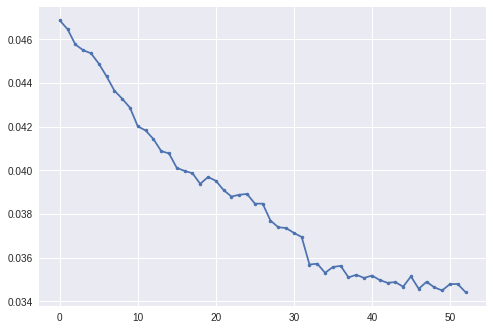

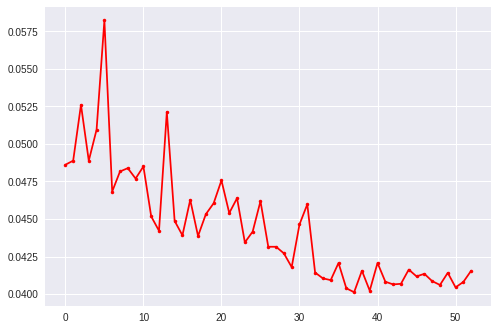

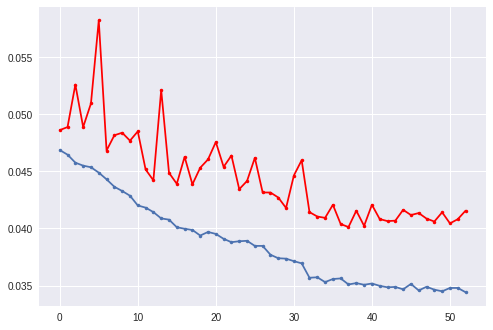

In [143]:
#plot the loss over epoch
Es_train = np.array(Es_train)
Es_train2 = Es_train.reshape((-1,nb))
Es_train3.extend([e for e in list(np.mean(Es_train2,axis=1))])
plt.plot(Es_train3,'.-')
#plot the loss over epoch
Es_valid = np.array(Es_valid)
Es_valid2 = Es_valid.reshape((-1,nb2))
Es_valid3.extend([e for e in list(np.mean(Es_valid2,axis=1))])
plt.figure()
plt.plot(Es_valid3,'.-r')
plt.figure()
plt.plot(Es_train3,'.-')
plt.plot(Es_valid3,'.-r')

In [146]:
epoch_r  = 73
epoch_r
Es_train=[]
Es_valid=[]
for epoch in range(epoch_r,epoch_r+epochs+1):

    start = time.time()

    metric.reset()

    train_iter.reset()
    
    valid_iter.reset()
    

    for batch in train_iter:
        # Copy data to executor input. Note the [:].
        data[:] = batch.data[0]
        label[:] = batch.label[0]

        # Forward
        outputs=exe.forward(is_train=True)
        Es_train.append(outputs[1].asnumpy()[0])
        # Backward
        exe.backward()

        # Update
        for i, pair in enumerate(zip(exe.arg_arrays, exe.grad_arrays)):
            weight, grad = pair
            updater(i, grad, weight)   
        metric.update(batch.label[0], exe.outputs[0])#metric.update(label,p)
        
    e=metric.get()
    err_train=-e[1][0].asnumpy()[0]
    err_train2=-e[1][1].asnumpy()[0]
    
    if epoch % 10== 0:       
        #print("do_checkpoint")
        arg={k:v for k, v in arg_arrays.items() if k not in input_shapes}
        aux = dict(zip(network.list_auxiliary_states(), exe.aux_arrays))
        mx.model.save_checkpoint(prefix, epoch, network, arg, aux)
        
        
    #compute valid loss per epoch    
    metric.reset()
    for batch in valid_iter:        
        data[:] = batch.data[0]       
        label[:] = batch.label[0]
        # predict
        outputs = exe.forward(is_train=False)
        Es_valid.append(outputs[1].asnumpy()[0])
        metric.update(batch.label[0], exe.outputs[0])
    e=metric.get()
    err_valid=-e[1][0].asnumpy()[0]
    err_valid2=-e[1][1].asnumpy()[0]
    end = time.time()
    print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'trainloss2:',err_train2,'validloss2:',err_valid2)
    trainlosses.append(err_train)
    validlosses.append(err_valid)
    trainlosses2.append(err_train2)
    validlosses2.append(err_valid2)
    #print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'trainloss2',outputs[1].asnumpy())

    #print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid)
    #for x,y in zip(e[0],e[1]):
      #print(x,y[0].asnumpy()[0], end=", ", flush=True)

/usr/local/lib/python3.6/dist-packages/mxnet/recordio.py:370: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  header = header._replace(label=np.fromstring(s, np.float32, header.flag))


time: 144.55220699310303 Epoch: 73 trainloss: -0.03428015 validloss: -0.04042194 trainloss2: -0.22911361 validloss2: -0.21356364
time: 144.12621092796326 Epoch: 74 trainloss: -0.034633104 validloss: -0.04122947 trainloss2: -0.22936681 validloss2: -0.216578
time: 144.41524744033813 Epoch: 75 trainloss: -0.034685586 validloss: -0.04012296 trainloss2: -0.2285847 validloss2: -0.21460652
time: 144.30850863456726 Epoch: 76 trainloss: -0.03426376 validloss: -0.04112227 trainloss2: -0.23015586 validloss2: -0.21602917
time: 144.3564054965973 Epoch: 77 trainloss: -0.034023497 validloss: -0.04007099 trainloss2: -0.23045084 validloss2: -0.21433774
time: 142.6258671283722 Epoch: 78 trainloss: -0.034769125 validloss: -0.039870266 trainloss2: -0.22910267 validloss2: -0.2124781
time: 142.43494129180908 Epoch: 79 trainloss: -0.034410518 validloss: -0.04071903 trainloss2: -0.23067926 validloss2: -0.2166887
time: 142.57866525650024 Epoch: 80 trainloss: -0.03433728 validloss: -0.039929677 trainloss2: -0.2

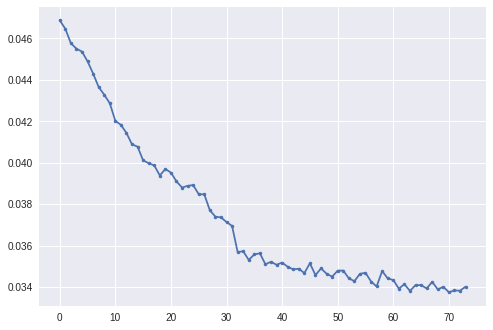

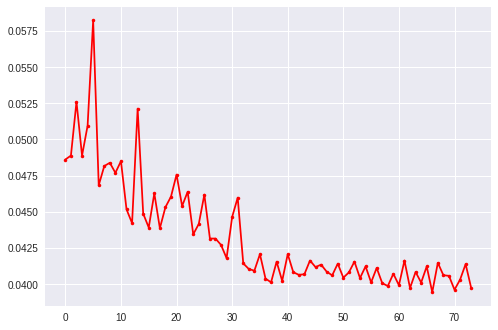

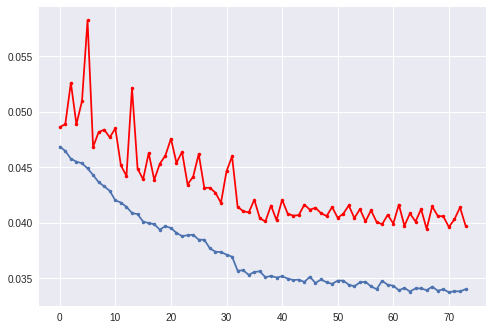

In [147]:
#plot the loss over epoch
Es_train = np.array(Es_train)
Es_train2 = Es_train.reshape((-1,nb))
Es_train3.extend([e for e in list(np.mean(Es_train2,axis=1))])
plt.plot(Es_train3,'.-')
#plot the loss over epoch
Es_valid = np.array(Es_valid)
Es_valid2 = Es_valid.reshape((-1,nb2))
Es_valid3.extend([e for e in list(np.mean(Es_valid2,axis=1))])
plt.figure()
plt.plot(Es_valid3,'.-r')
plt.figure()
plt.plot(Es_train3,'.-')
plt.plot(Es_valid3,'.-r')

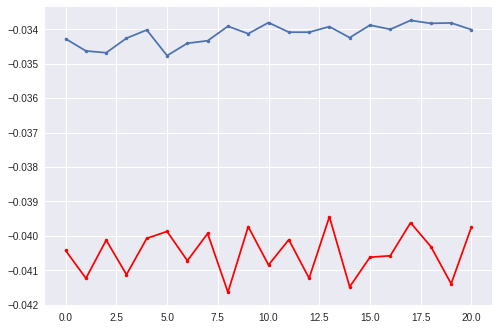

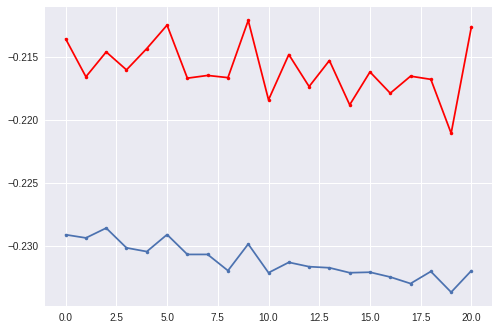

In [148]:
plt.plot(trainlosses,'.-')
plt.plot(validlosses,'.-r')
plt.figure()
plt.plot(trainlosses2,'.-')
plt.plot(validlosses2,'.-r')

In [0]:
# We also need to create an optimizer for updating weights
# ===============Optimizer=================                        
opt = mx.optimizer.SGD(
    learning_rate=.0001,momentum=0.99,wd=0.000001)
updater = mx.optimizer.get_updater(opt)
updater.optimizer.lr_scheduler=None

In [150]:
epoch_r  = 93
epoch_r
Es_train=[]
Es_valid=[]
for epoch in range(epoch_r,epoch_r+epochs+1):

    start = time.time()

    metric.reset()

    train_iter.reset()
    
    valid_iter.reset()
    

    for batch in train_iter:
        # Copy data to executor input. Note the [:].
        data[:] = batch.data[0]
        label[:] = batch.label[0]

        # Forward
        outputs=exe.forward(is_train=True)
        Es_train.append(outputs[1].asnumpy()[0])
        # Backward
        exe.backward()

        # Update
        for i, pair in enumerate(zip(exe.arg_arrays, exe.grad_arrays)):
            weight, grad = pair
            updater(i, grad, weight)   
        metric.update(batch.label[0], exe.outputs[0])#metric.update(label,p)
        
    e=metric.get()
    err_train=-e[1][0].asnumpy()[0]
    err_train2=-e[1][1].asnumpy()[0]
    
    if epoch % 10== 0:       
        #print("do_checkpoint")
        arg={k:v for k, v in arg_arrays.items() if k not in input_shapes}
        aux = dict(zip(network.list_auxiliary_states(), exe.aux_arrays))
        mx.model.save_checkpoint(prefix, epoch, network, arg, aux)
        
        
    #compute valid loss per epoch    
    metric.reset()
    for batch in valid_iter:        
        data[:] = batch.data[0]       
        label[:] = batch.label[0]
        # predict
        outputs = exe.forward(is_train=False)
        Es_valid.append(outputs[1].asnumpy()[0])
        metric.update(batch.label[0], exe.outputs[0])
    e=metric.get()
    err_valid=-e[1][0].asnumpy()[0]
    err_valid2=-e[1][1].asnumpy()[0]
    end = time.time()
    print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'trainloss2:',err_train2,'validloss2:',err_valid2)
    trainlosses.append(err_train)
    validlosses.append(err_valid)
    trainlosses2.append(err_train2)
    validlosses2.append(err_valid2)
    #print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'trainloss2',outputs[1].asnumpy())

    #print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid)
    #for x,y in zip(e[0],e[1]):
      #print(x,y[0].asnumpy()[0], end=", ", flush=True)

/usr/local/lib/python3.6/dist-packages/mxnet/recordio.py:370: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  header = header._replace(label=np.fromstring(s, np.float32, header.flag))


time: 142.95451259613037 Epoch: 93 trainloss: -0.03368342 validloss: -0.039817594 trainloss2: -0.23261875 validloss2: -0.21750367
time: 142.6477451324463 Epoch: 94 trainloss: -0.033362575 validloss: -0.04005527 trainloss2: -0.23371199 validloss2: -0.21825823
time: 142.7343831062317 Epoch: 95 trainloss: -0.033425305 validloss: -0.04033748 trainloss2: -0.23367299 validloss2: -0.21839032
time: 142.61328649520874 Epoch: 96 trainloss: -0.033620633 validloss: -0.040111143 trainloss2: -0.2335632 validloss2: -0.21891983
time: 142.67232823371887 Epoch: 97 trainloss: -0.033483174 validloss: -0.03991282 trainloss2: -0.23388563 validloss2: -0.21893108
time: 142.51609301567078 Epoch: 98 trainloss: -0.033640303 validloss: -0.040201236 trainloss2: -0.23409238 validloss2: -0.2197546
time: 142.35218453407288 Epoch: 99 trainloss: -0.03395147 validloss: -0.040811032 trainloss2: -0.23319592 validloss2: -0.21960393
time: 142.60623383522034 Epoch: 100 trainloss: -0.033327524 validloss: -0.040218517 trainlos

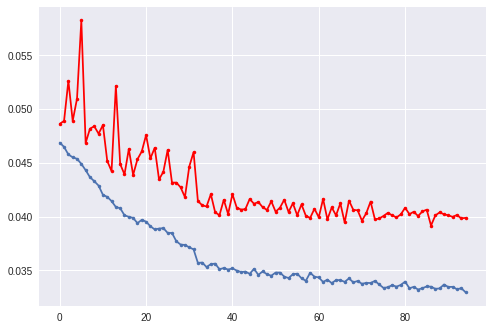

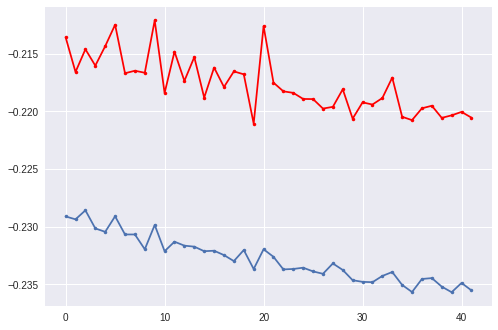

In [151]:
#plot the loss over epoch
Es_train = np.array(Es_train)
Es_train2 = Es_train.reshape((-1,nb))
Es_train3.extend([e for e in list(np.mean(Es_train2,axis=1))])
#plot the loss over epoch
Es_valid = np.array(Es_valid)
Es_valid2 = Es_valid.reshape((-1,nb2))
Es_valid3.extend([e for e in list(np.mean(Es_valid2,axis=1))])
plt.figure()
plt.plot(Es_train3,'.-')
plt.plot(Es_valid3,'.-r')
plt.figure()
plt.plot(trainlosses2,'.-')
plt.plot(validlosses2,'.-r')

In [0]:
lrs = []
loss = []

In [0]:

sched=nn.lr_find(1e-4,nb,end_lr=1e-3)
# We also need to create an optimizer for updating weights
opt = mx.optimizer.SGD(
    learning_rate=1e-4,
    momentum=0.9,
    wd=0.00001,
    lr_scheduler=sched)

updater = mx.optimizer.get_updater(opt)
for epoch in range(0,1):

    start = time.time()

    metric.reset()

    train_iter.reset()
    
    valid_iter.reset()
    
    sched.reset()
        
    sched.on_train_begin()
    

    for batch in train_iter:
        # Copy data to executor input. Note the [:].
        data[:] = batch.data[0]
        label[:] = batch.label[0]

        # Forward
        outputs=exe.forward(is_train=True)
        # Backward
        exe.backward()

        # Update
        for i, pair in enumerate(zip(exe.arg_arrays, exe.grad_arrays)):
            weight, grad = pair
            updater(i, grad, weight)   
        #metric.update(batch.label[0], exe.outputs[0])#
        metric.update(batch.label[0], exe.outputs[0])
        
        e=metric.get()
        err_train=-e[1][0].asnumpy()[0]
        sched.on_batch_end(err_train)
    
    if epoch % 100== 0:       
        #print("do_checkpoint")
        arg={k:v for k, v in arg_arrays.items() if k not in input_shapes}
        aux = dict(zip(network.list_auxiliary_states(), exe.aux_arrays))
        mx.model.save_checkpoint(prefix, epoch, network, arg, aux)
        
        
    #compute valid loss per epoch    
    metric.reset()
    for batch in valid_iter:        
        data[:] = batch.data[0]       
        label[:] = batch.label[0]
        # predict
        outputs = exe.forward(is_train=False)
        metric.update(batch.label[0], exe.outputs[0])
    e=metric.get()
    err_valid=-e[1][0].asnumpy()[0]
    end = time.time()
    print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'CE',outputs[1].asnumpy())
    for x,y in zip(e[0],e[1]):
      print(x,y[0].asnumpy()[0], end=", ", flush=True)
plt.plot(sched.lrs, sched.losses,'*-')

/usr/local/lib/python3.6/dist-packages/mxnet/recordio.py:370: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  header = header._replace(label=np.fromstring(s, np.float32, header.flag))


time: 153.40694093704224 Epoch: 0 trainloss: -0.033849176 validloss: -0.04682545 CE [0.03590346]
logloss2 0.04682545, dice_coef2 0.21555789, 

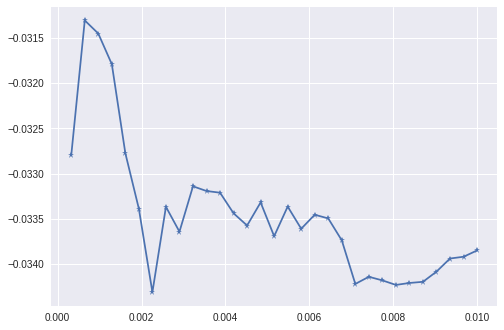

In [153]:

sched=nn.lr_find(1e-3,nb,end_lr=1e-2)
# We also need to create an optimizer for updating weights
opt = mx.optimizer.SGD(
    learning_rate=1e-3,
    momentum=0.9,
    wd=0.00001,
    lr_scheduler=sched)

updater = mx.optimizer.get_updater(opt)
for epoch in range(0,1):

    start = time.time()

    metric.reset()

    train_iter.reset()
    
    valid_iter.reset()
    
    sched.reset()
        
    sched.on_train_begin()
    

    for batch in train_iter:
        # Copy data to executor input. Note the [:].
        data[:] = batch.data[0]
        label[:] = batch.label[0]

        # Forward
        outputs=exe.forward(is_train=True)
        # Backward
        exe.backward()

        # Update
        for i, pair in enumerate(zip(exe.arg_arrays, exe.grad_arrays)):
            weight, grad = pair
            updater(i, grad, weight)   
        #metric.update(batch.label[0], exe.outputs[0])#
        metric.update(batch.label[0], exe.outputs[0])
        
        e=metric.get()
        err_train=-e[1][0].asnumpy()[0]
        sched.on_batch_end(err_train)
    
    if epoch % 100== 0:       
        #print("do_checkpoint")
        arg={k:v for k, v in arg_arrays.items() if k not in input_shapes}
        aux = dict(zip(network.list_auxiliary_states(), exe.aux_arrays))
        mx.model.save_checkpoint(prefix, epoch, network, arg, aux)
        
        
    #compute valid loss per epoch    
    metric.reset()
    for batch in valid_iter:        
        data[:] = batch.data[0]       
        label[:] = batch.label[0]
        # predict
        outputs = exe.forward(is_train=False)
        metric.update(batch.label[0], exe.outputs[0])
    e=metric.get()
    err_valid=-e[1][0].asnumpy()[0]
    end = time.time()
    print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'CE',outputs[1].asnumpy())
    for x,y in zip(e[0],e[1]):
      print(x,y[0].asnumpy()[0], end=", ", flush=True)
plt.plot(sched.lrs, sched.losses,'*-')

/usr/local/lib/python3.6/dist-packages/mxnet/recordio.py:370: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  header = header._replace(label=np.fromstring(s, np.float32, header.flag))


time: 153.10494089126587 Epoch: 0 trainloss: -0.043897804 validloss: -0.16508721 CE [0.16618328]
logloss2 0.16508721, dice_coef2 0.11682584, 

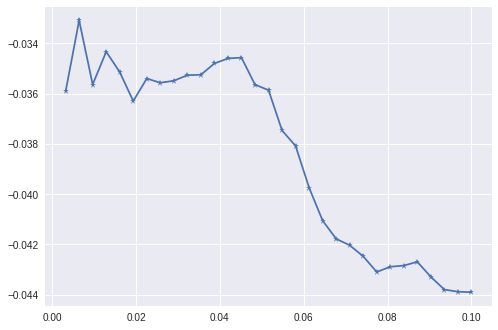

In [154]:

sched=nn.lr_find(1e-2,nb,end_lr=1e-1)
# We also need to create an optimizer for updating weights
opt = mx.optimizer.SGD(
    learning_rate=1e-2,
    momentum=0.9,
    wd=0.00001,
    lr_scheduler=sched)

updater = mx.optimizer.get_updater(opt)
for epoch in range(0,1):

    start = time.time()

    metric.reset()

    train_iter.reset()
    
    valid_iter.reset()
    
    sched.reset()
        
    sched.on_train_begin()
    

    for batch in train_iter:
        # Copy data to executor input. Note the [:].
        data[:] = batch.data[0]
        label[:] = batch.label[0]

        # Forward
        outputs=exe.forward(is_train=True)
        # Backward
        exe.backward()

        # Update
        for i, pair in enumerate(zip(exe.arg_arrays, exe.grad_arrays)):
            weight, grad = pair
            updater(i, grad, weight)   
        #metric.update(batch.label[0], exe.outputs[0])#
        metric.update(batch.label[0], exe.outputs[0])
        
        e=metric.get()
        err_train=-e[1][0].asnumpy()[0]
        sched.on_batch_end(err_train)
    
    if epoch % 100== 0:       
        #print("do_checkpoint")
        arg={k:v for k, v in arg_arrays.items() if k not in input_shapes}
        aux = dict(zip(network.list_auxiliary_states(), exe.aux_arrays))
        mx.model.save_checkpoint(prefix, epoch, network, arg, aux)
        
        
    #compute valid loss per epoch    
    metric.reset()
    for batch in valid_iter:        
        data[:] = batch.data[0]       
        label[:] = batch.label[0]
        # predict
        outputs = exe.forward(is_train=False)
        metric.update(batch.label[0], exe.outputs[0])
    e=metric.get()
    err_valid=-e[1][0].asnumpy()[0]
    end = time.time()
    print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'CE',outputs[1].asnumpy())
    for x,y in zip(e[0],e[1]):
      print(x,y[0].asnumpy()[0], end=", ", flush=True)
plt.plot(sched.lrs, sched.losses,'*-')

/usr/local/lib/python3.6/dist-packages/mxnet/recordio.py:370: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  header = header._replace(label=np.fromstring(s, np.float32, header.flag))


time: 152.06420826911926 Epoch: 0 trainloss: -0.061246555 validloss: -0.33522666 CE [0.36099553]
logloss2 0.33522666, dice_coef2 0.12867476, 

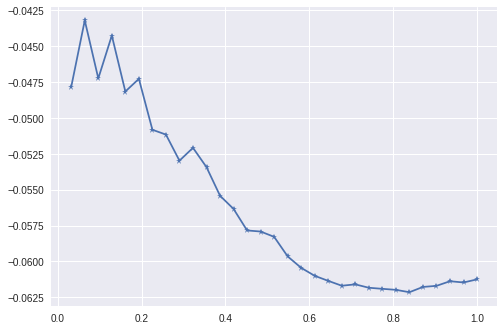

In [155]:

sched=nn.lr_find(1e-1,nb,end_lr=1)
# We also need to create an optimizer for updating weights
opt = mx.optimizer.SGD(
    learning_rate=1e-1,
    momentum=0.9,
    wd=0.00001,
    lr_scheduler=sched)

updater = mx.optimizer.get_updater(opt)
for epoch in range(0,1):

    start = time.time()

    metric.reset()

    train_iter.reset()
    
    valid_iter.reset()
    
    sched.reset()
        
    sched.on_train_begin()
    

    for batch in train_iter:
        # Copy data to executor input. Note the [:].
        data[:] = batch.data[0]
        label[:] = batch.label[0]

        # Forward
        outputs=exe.forward(is_train=True)
        # Backward
        exe.backward()

        # Update
        for i, pair in enumerate(zip(exe.arg_arrays, exe.grad_arrays)):
            weight, grad = pair
            updater(i, grad, weight)   
        #metric.update(batch.label[0], exe.outputs[0])#
        metric.update(batch.label[0], exe.outputs[0])
        
        e=metric.get()
        err_train=-e[1][0].asnumpy()[0]
        sched.on_batch_end(err_train)
    
    if epoch % 100== 0:       
        #print("do_checkpoint")
        arg={k:v for k, v in arg_arrays.items() if k not in input_shapes}
        aux = dict(zip(network.list_auxiliary_states(), exe.aux_arrays))
        mx.model.save_checkpoint(prefix, epoch, network, arg, aux)
        
        
    #compute valid loss per epoch    
    metric.reset()
    for batch in valid_iter:        
        data[:] = batch.data[0]       
        label[:] = batch.label[0]
        # predict
        outputs = exe.forward(is_train=False)
        metric.update(batch.label[0], exe.outputs[0])
    e=metric.get()
    err_valid=-e[1][0].asnumpy()[0]
    end = time.time()
    print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'CE',outputs[1].asnumpy())
    for x,y in zip(e[0],e[1]):
      print(x,y[0].asnumpy()[0], end=", ", flush=True)
plt.plot(sched.lrs, sched.losses,'*-')

In [0]:
# We also need to create an optimizer for updating weights
# ===============Optimizer=================                        
opt = mx.optimizer.SGD(
    learning_rate=.5,momentum=0.99,wd=0.000001)
updater = mx.optimizer.get_updater(opt)
updater.optimizer.lr_scheduler=None

In [157]:
epoch_r  = 113
epoch_r
Es_train=[]
Es_valid=[]
for epoch in range(epoch_r,epoch_r+epochs+1):

    start = time.time()

    metric.reset()

    train_iter.reset()
    
    valid_iter.reset()
    

    for batch in train_iter:
        # Copy data to executor input. Note the [:].
        data[:] = batch.data[0]
        label[:] = batch.label[0]

        # Forward
        outputs=exe.forward(is_train=True)
        Es_train.append(outputs[1].asnumpy()[0])
        # Backward
        exe.backward()

        # Update
        for i, pair in enumerate(zip(exe.arg_arrays, exe.grad_arrays)):
            weight, grad = pair
            updater(i, grad, weight)   
        metric.update(batch.label[0], exe.outputs[0])#metric.update(label,p)
        
    e=metric.get()
    err_train=-e[1][0].asnumpy()[0]
    err_train2=-e[1][1].asnumpy()[0]
    
    if epoch % 10== 0:       
        #print("do_checkpoint")
        arg={k:v for k, v in arg_arrays.items() if k not in input_shapes}
        aux = dict(zip(network.list_auxiliary_states(), exe.aux_arrays))
        mx.model.save_checkpoint(prefix, epoch, network, arg, aux)
        
        
    #compute valid loss per epoch    
    metric.reset()
    for batch in valid_iter:        
        data[:] = batch.data[0]       
        label[:] = batch.label[0]
        # predict
        outputs = exe.forward(is_train=False)
        Es_valid.append(outputs[1].asnumpy()[0])
        metric.update(batch.label[0], exe.outputs[0])
    e=metric.get()
    err_valid=-e[1][0].asnumpy()[0]
    err_valid2=-e[1][1].asnumpy()[0]
    end = time.time()
    print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'trainloss2:',err_train2,'validloss2:',err_valid2)
    trainlosses.append(err_train)
    validlosses.append(err_valid)
    trainlosses2.append(err_train2)
    validlosses2.append(err_valid2)
    #print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'trainloss2',outputs[1].asnumpy())

    #print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid)
    #for x,y in zip(e[0],e[1]):
      #print(x,y[0].asnumpy()[0], end=", ", flush=True)

/usr/local/lib/python3.6/dist-packages/mxnet/recordio.py:370: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  header = header._replace(label=np.fromstring(s, np.float32, header.flag))


time: 141.94930028915405 Epoch: 113 trainloss: -0.059765197 validloss: -0.18920004 trainloss2: -0.16705194 validloss2: -0.11290616
time: 141.52648377418518 Epoch: 114 trainloss: -0.056702048 validloss: -0.21080142 trainloss2: -0.1665348 validloss2: -0.11183122
time: 141.8656063079834 Epoch: 115 trainloss: -0.054347612 validloss: -0.08545515 trainloss2: -0.18165313 validloss2: -0.13778295
time: 141.84667348861694 Epoch: 116 trainloss: -0.05184987 validloss: -0.06226538 trainloss2: -0.19132432 validloss2: -0.15138155
time: 141.8080701828003 Epoch: 117 trainloss: -0.04912366 validloss: -0.053650428 trainloss2: -0.19311441 validloss2: -0.18000892
time: 142.51893639564514 Epoch: 118 trainloss: -0.04714379 validloss: -0.04948191 trainloss2: -0.20432268 validloss2: -0.18239483
time: 142.03109407424927 Epoch: 119 trainloss: -0.04550637 validloss: -0.061685666 trainloss2: -0.2083809 validloss2: -0.17386015
time: 142.06834363937378 Epoch: 120 trainloss: -0.045120403 validloss: -0.052198637 train

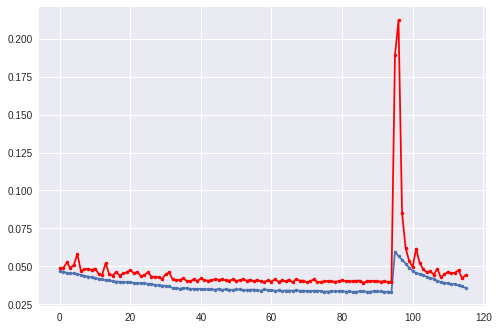

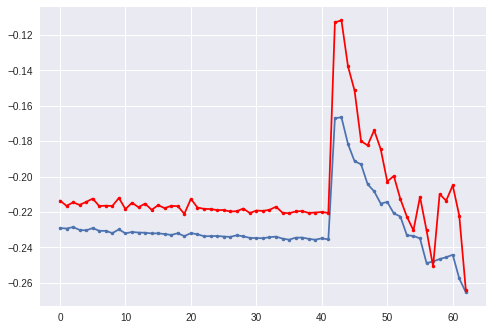

In [158]:
#plot the loss over epoch
Es_train = np.array(Es_train)
Es_train2 = Es_train.reshape((-1,nb))
Es_train3.extend([e for e in list(np.mean(Es_train2,axis=1))])
#plot the loss over epoch
Es_valid = np.array(Es_valid)
Es_valid2 = Es_valid.reshape((-1,nb2))
Es_valid3.extend([e for e in list(np.mean(Es_valid2,axis=1))])
plt.figure()
plt.plot(Es_train3,'.-')
plt.plot(Es_valid3,'.-r')
plt.figure()
plt.plot(trainlosses2,'.-')
plt.plot(validlosses2,'.-r')

In [0]:
find_stats = False#True
bs = 100#64#34
load_model = True
model_path = "drive/My Drive/x110/model/dec03"
model_epoch=130
prefix = "drive/My Drive/x110/model/dec03"

In [1]:
epoch_r  = 133
epoch_r
Es_train=[]
Es_valid=[]
for epoch in range(epoch_r,epoch_r+epochs+1):

    start = time.time()

    metric.reset()

    train_iter.reset()
    
    valid_iter.reset()
    

    for batch in train_iter:
        # Copy data to executor input. Note the [:].
        data[:] = batch.data[0]
        label[:] = batch.label[0]

        # Forward
        outputs=exe.forward(is_train=True)
        Es_train.append(outputs[1].asnumpy()[0])
        # Backward
        exe.backward()

        # Update
        for i, pair in enumerate(zip(exe.arg_arrays, exe.grad_arrays)):
            weight, grad = pair
            updater(i, grad, weight)   
        metric.update(batch.label[0], exe.outputs[0])#metric.update(label,p)
        
    e=metric.get()
    err_train=-e[1][0].asnumpy()[0]
    err_train2=-e[1][1].asnumpy()[0]
    
    if epoch % 10== 0:       
        #print("do_checkpoint")
        arg={k:v for k, v in arg_arrays.items() if k not in input_shapes}
        aux = dict(zip(network.list_auxiliary_states(), exe.aux_arrays))
        mx.model.save_checkpoint(prefix, epoch, network, arg, aux)
        
        
    #compute valid loss per epoch    
    metric.reset()
    for batch in valid_iter:        
        data[:] = batch.data[0]       
        label[:] = batch.label[0]
        # predict
        outputs = exe.forward(is_train=False)
        Es_valid.append(outputs[1].asnumpy()[0])
        metric.update(batch.label[0], exe.outputs[0])
    e=metric.get()
    err_valid=-e[1][0].asnumpy()[0]
    err_valid2=-e[1][1].asnumpy()[0]
    end = time.time()
    print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'trainloss2:',err_train2,'validloss2:',err_valid2)
    trainlosses.append(err_train)
    validlosses.append(err_valid)
    trainlosses2.append(err_train2)
    validlosses2.append(err_valid2)
    #print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid,'trainloss2',outputs[1].asnumpy())

    #print('time:',end-start,'Epoch:',epoch,'trainloss:',err_train,'validloss:',err_valid)
    #for x,y in zip(e[0],e[1]):
      #print(x,y[0].asnumpy()[0], end=", ", flush=True)

NameError: ignored